In [3]:
from fyp_model.models.trajectory import PredictTrajectory
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
import matplotlib.patches as patches
from matplotlib.transforms import Bbox
from fyp_model.bounding_box_plotter import BoundingBoxPlotter
import cv2

import numpy as np

%matplotlib widget

In [4]:
person_id = 1
frame_id = 60
tdy = datetime.today().strftime("%d%m%Y")

In [40]:
pred = PredictTrajectory(file="../inference/seq/gt.txt", 
                         model_path="../weights/pred_22_03_23_1632.tar", 
                         output_file=f"../output/{tdy}_{person_id}_{frame_id}_pred.txt", 
                         img_height=1080,
                         img_width=1920,
                         past_frames=60, 
                         future_frames=30, 
                         input_size = 8, 
                         enc_hidden_size = 512, 
                         enc_output_size = 256, 
                         velocity=True
                         ).cuda()

In [6]:
data = pred.predict(person_id=person_id, frame_id = frame_id)

NameError: name 'pred' is not defined

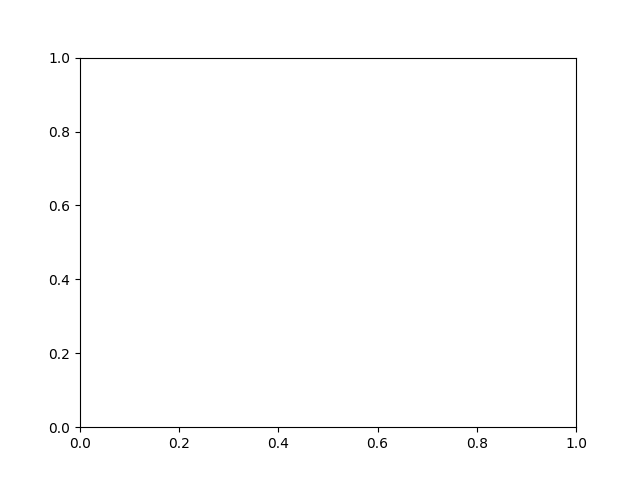

In [11]:
fig, ax = plt.subplots();

In [16]:
ims = []

bbplotter = BoundingBoxPlotter()
pr_data = np.loadtxt(f"../output/{tdy}_{person_id}_{frame_id}_pred.txt", delimiter=',')
gt_data = np.loadtxt(f"../inference/seq/gt.txt", delimiter=',')

for i in pr_data[:, 0]:
    from pathlib import Path
    path = Path(f"../inference/images/img1/{str(int(i)).zfill(6)}.jpg").resolve()
    
    im = cv2.imread(str(path))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    gt_data_ind = gt_data[np.where((gt_data[:, 0] == i) & (gt_data[:, 1] == person_id))]

    bbplotter.draw_mot(im, pr_data[pr_data[:, 0] == i], label = "Prediction")
    bbplotter.draw_mot(im, gt_data_ind, label = "Ground Truth")
    
    im = ax.imshow(im, animated=True)
    ims.append([im])

    plt.draw()

In [17]:
ani = animation.ArtistAnimation(fig, ims, blit=True, repeat_delay=100)

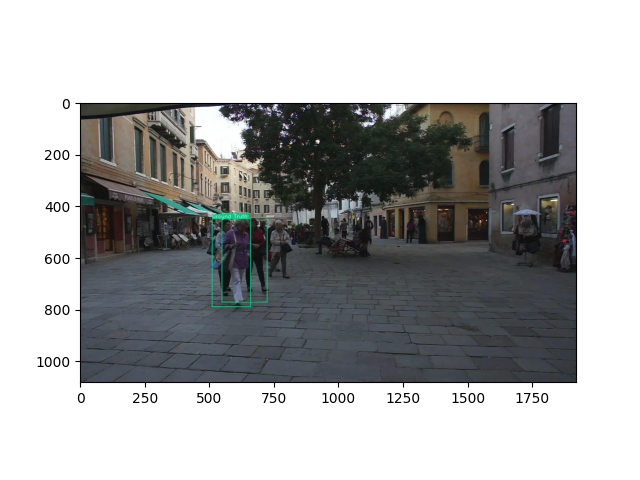

In [18]:
plt.show()